# Numerics with Numpy

Numpy is the core of the numerical Python ecosystem. It is critical for fast math operations, and avoid loops.

In [1]:
import numpy as np

x = np.arange(0,10)
x

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [2]:
x*x

array([ 0,  1,  4,  9, 16, 25, 36, 49, 64, 81])

In [3]:
x*x.reshape((-1,1))

array([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18],
       [ 0,  3,  6,  9, 12, 15, 18, 21, 24, 27],
       [ 0,  4,  8, 12, 16, 20, 24, 28, 32, 36],
       [ 0,  5, 10, 15, 20, 25, 30, 35, 40, 45],
       [ 0,  6, 12, 18, 24, 30, 36, 42, 48, 54],
       [ 0,  7, 14, 21, 28, 35, 42, 49, 56, 63],
       [ 0,  8, 16, 24, 32, 40, 48, 56, 64, 72],
       [ 0,  9, 18, 27, 36, 45, 54, 63, 72, 81]])

In [4]:
x = np.arange(0,100)
%timeit -r1 -n 1000 x*x.reshape((-1,1))

15.1 µs ± 0 ns per loop (mean ± std. dev. of 1 run, 1000 loops each)


In [5]:
%timeit -r1 -n 1000 [[i*j for i in range(100)] for j in range(100)]

470 µs ± 0 ns per loop (mean ± std. dev. of 1 run, 1000 loops each)


Learn about broadcasting rules, and @vectorize, and generalized ufuncs and "fancy indexing".

```
def timeit
    dts = []
    for i in range 7:
        t = tic()
        for j in range 10 000:
            ... code to profile ...
        dt = toc()-t
        dts.append(dt)
        
    return mean(dts)/10 000, std(dts)/10 000
```

## Take some time to "think" in higher dimension

Usually worth it, code is easier to read and write, more compact and often more correct. You also look like a wizard. Want to see the power, look at numpy "einsum" for arbitrary dimentional tensor reductions.

# SciPy

A lot of the special function (BesselJ, erf, ...), ODE, integrations, are in the SciPy the library.
Same for reading a lot of data files types, like `.mat`. I'll abuse and put numpy/scipy in the the same bag.

## Xarray

numpy + labeled axes

## Numpy is also lingua franca for libraries to talk between each other. You may need some "glue" in numpy.

- Numpy on GPU == cuPy, or Rapids,    Same API, but narrower, drop in replacement but compute on GPU.

- Numpy on multi-core, multi node : Dask

- Numpy+Jit, Numba

-  `__array_function__` == "I can behave like numpy but"

## Pandas for dataframes/timeseries

Pandas is like numpy a base, and for performance you want to use Pandas-Like compatible libraries (Vaex, Dask-Dataframe, CuDF, parquet, arrow, Rapids...) 

## Parallel computing  with Dask

Low and high level API. Create a "Task Graph" and execute it on many cores, or machines.

In [6]:
from dask.distributed import Client

client = Client(n_workers=2)
client

<Client: 'tcp://127.0.0.1:60979' processes=2 threads=8, memory=17.18 GB>

In [7]:
import dask.array as da
x = da.random.random((8000, 8000), chunks=(2000, 2000))
x

dask.array<random_sample, shape=(8000, 8000), dtype=float64, chunksize=(2000, 2000), chunktype=numpy.ndarray>

In [8]:
m  = x*x.T

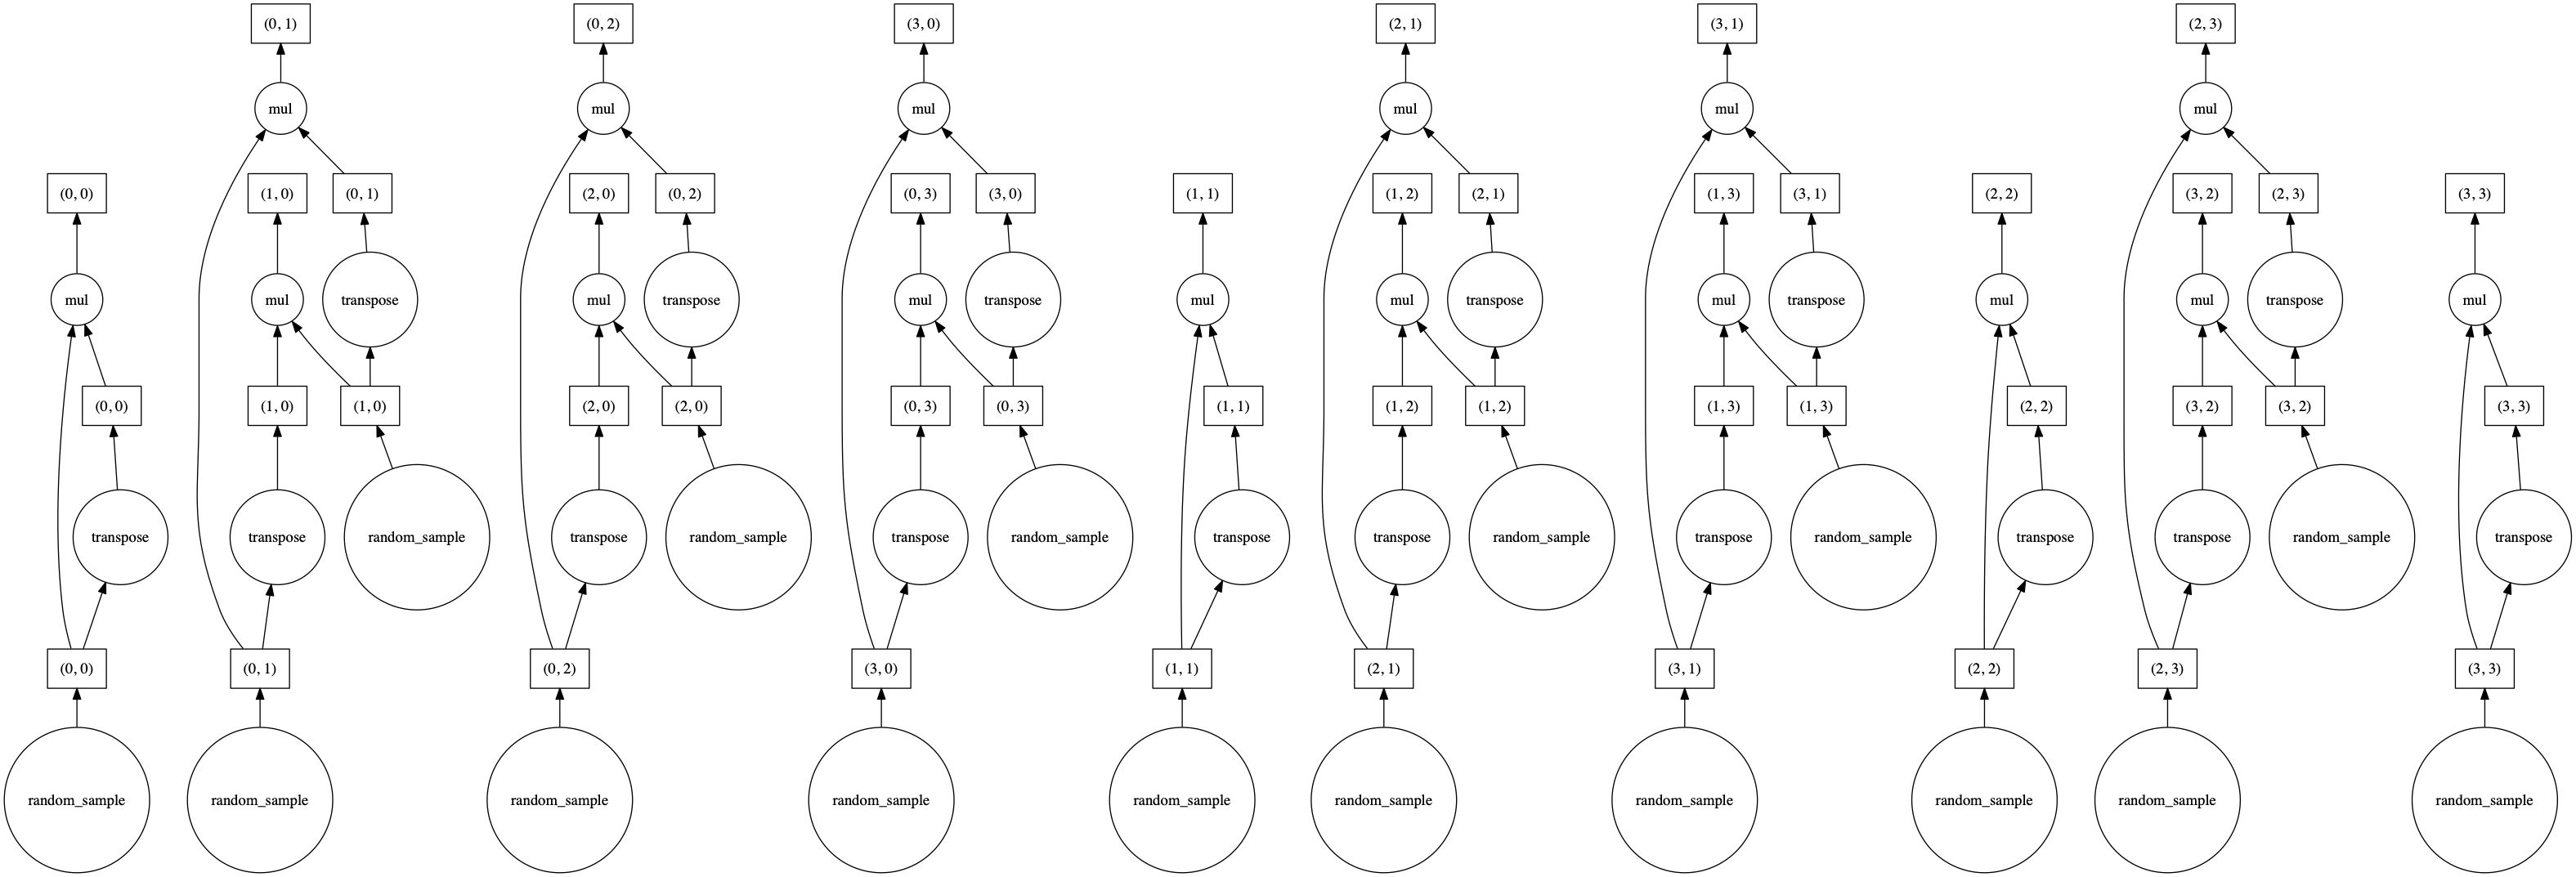

In [11]:
m.visualize()

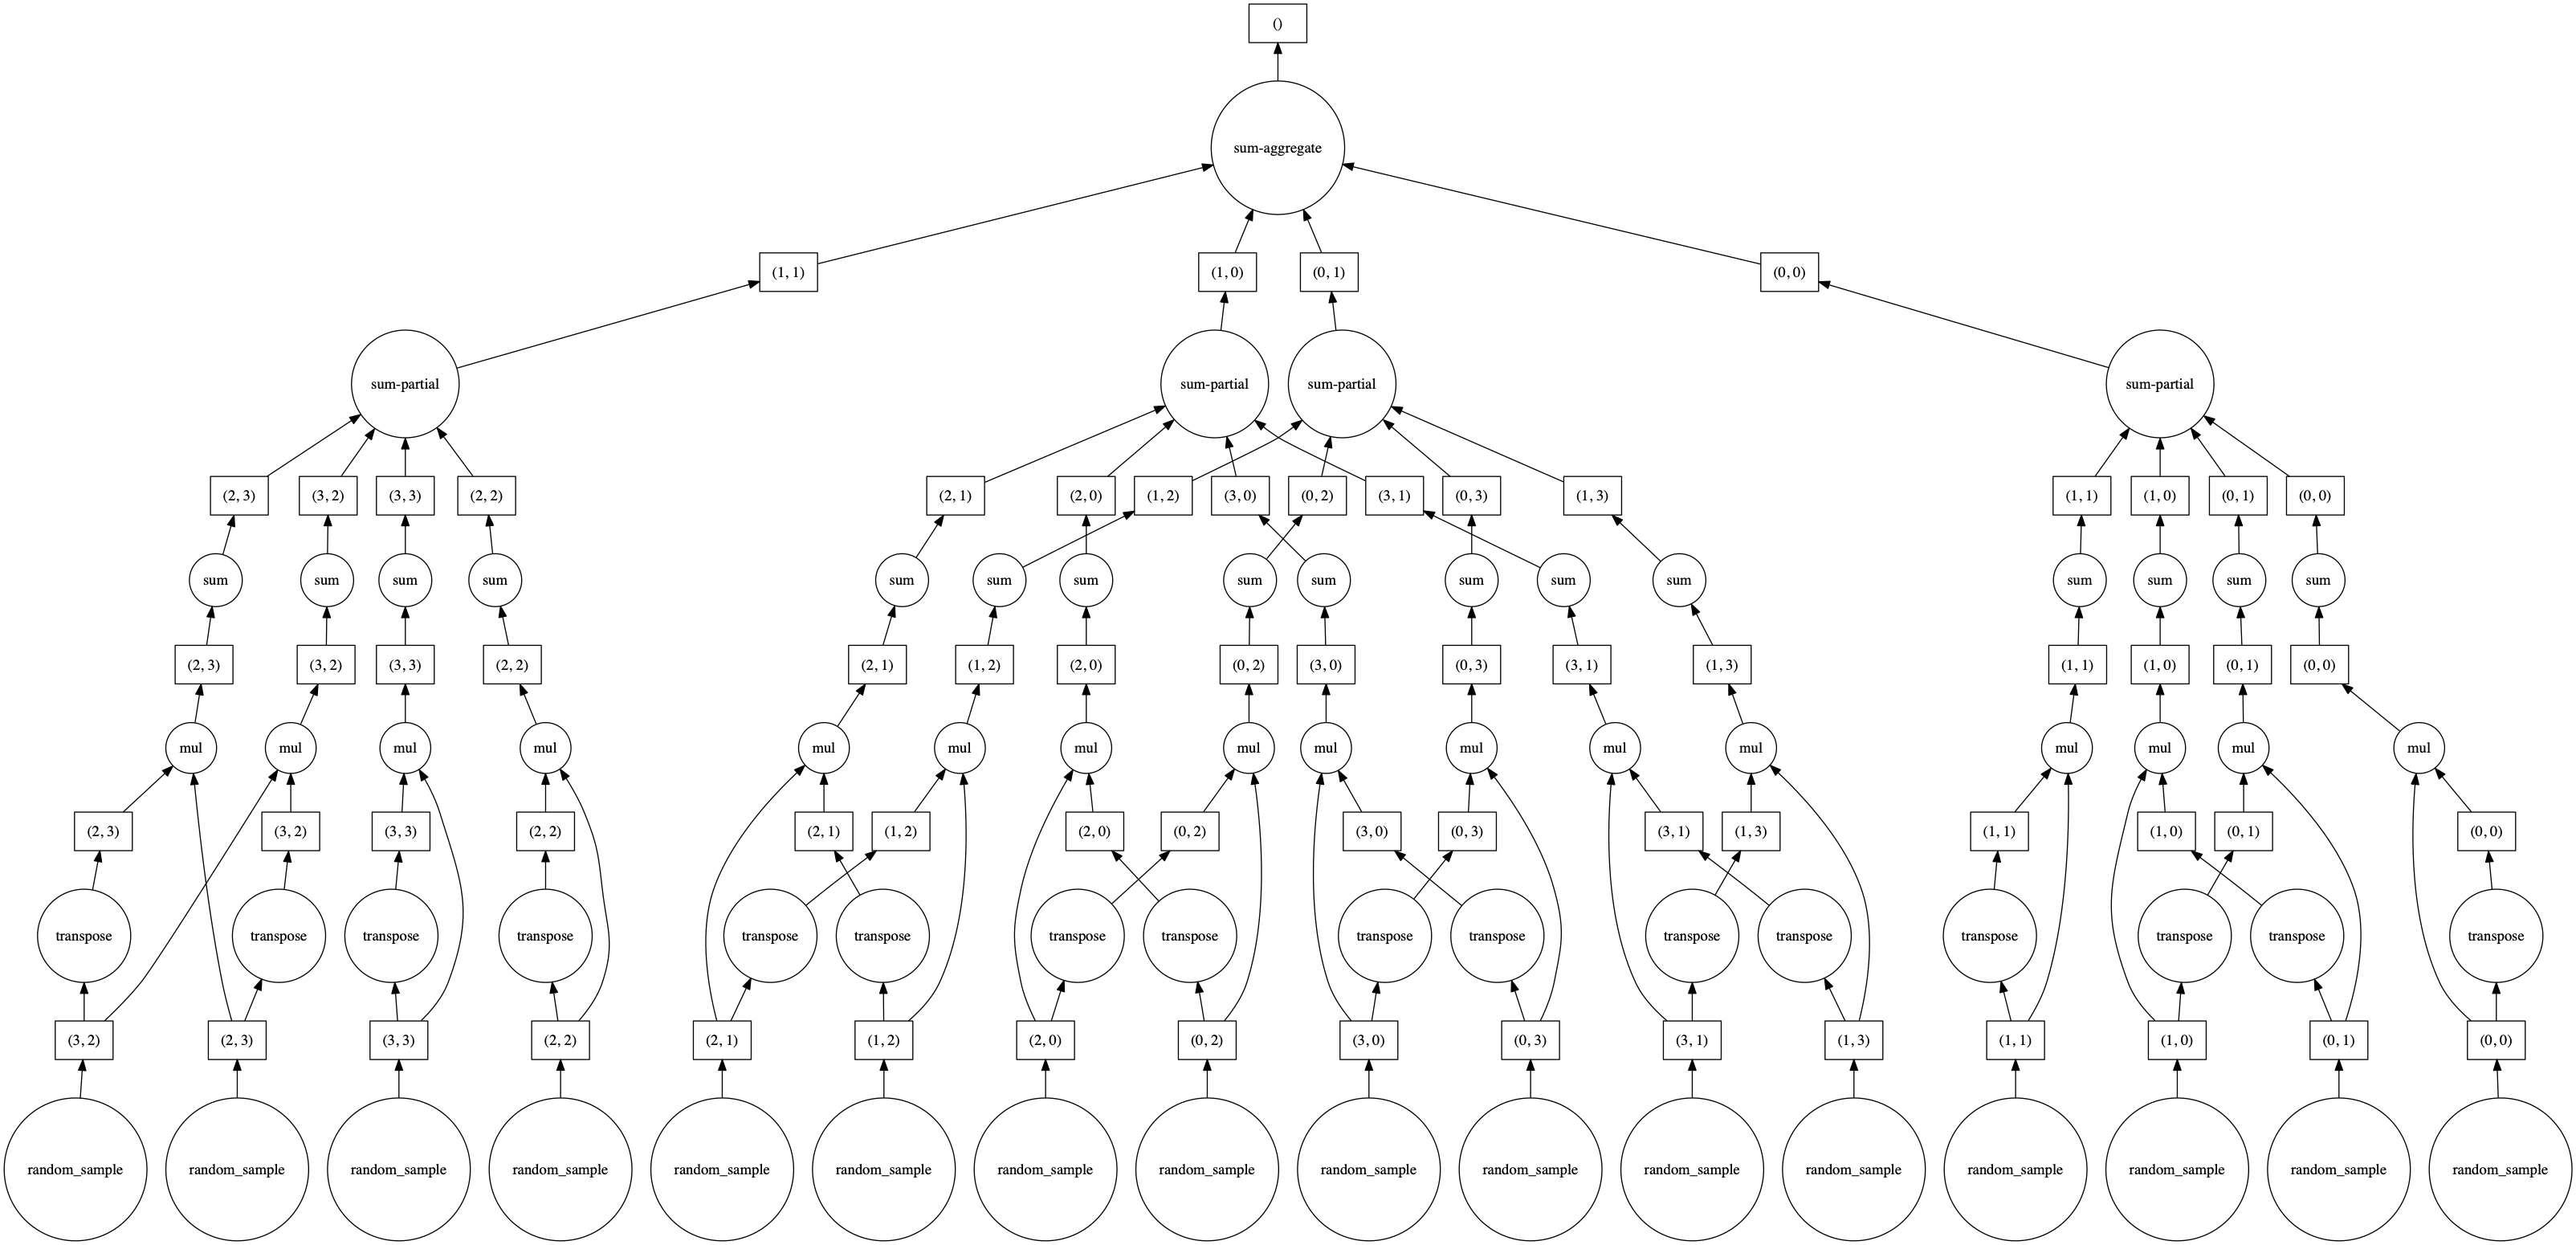

In [9]:
m.sum().visualize()

In [10]:
m.sum().compute()

16002177.271850724

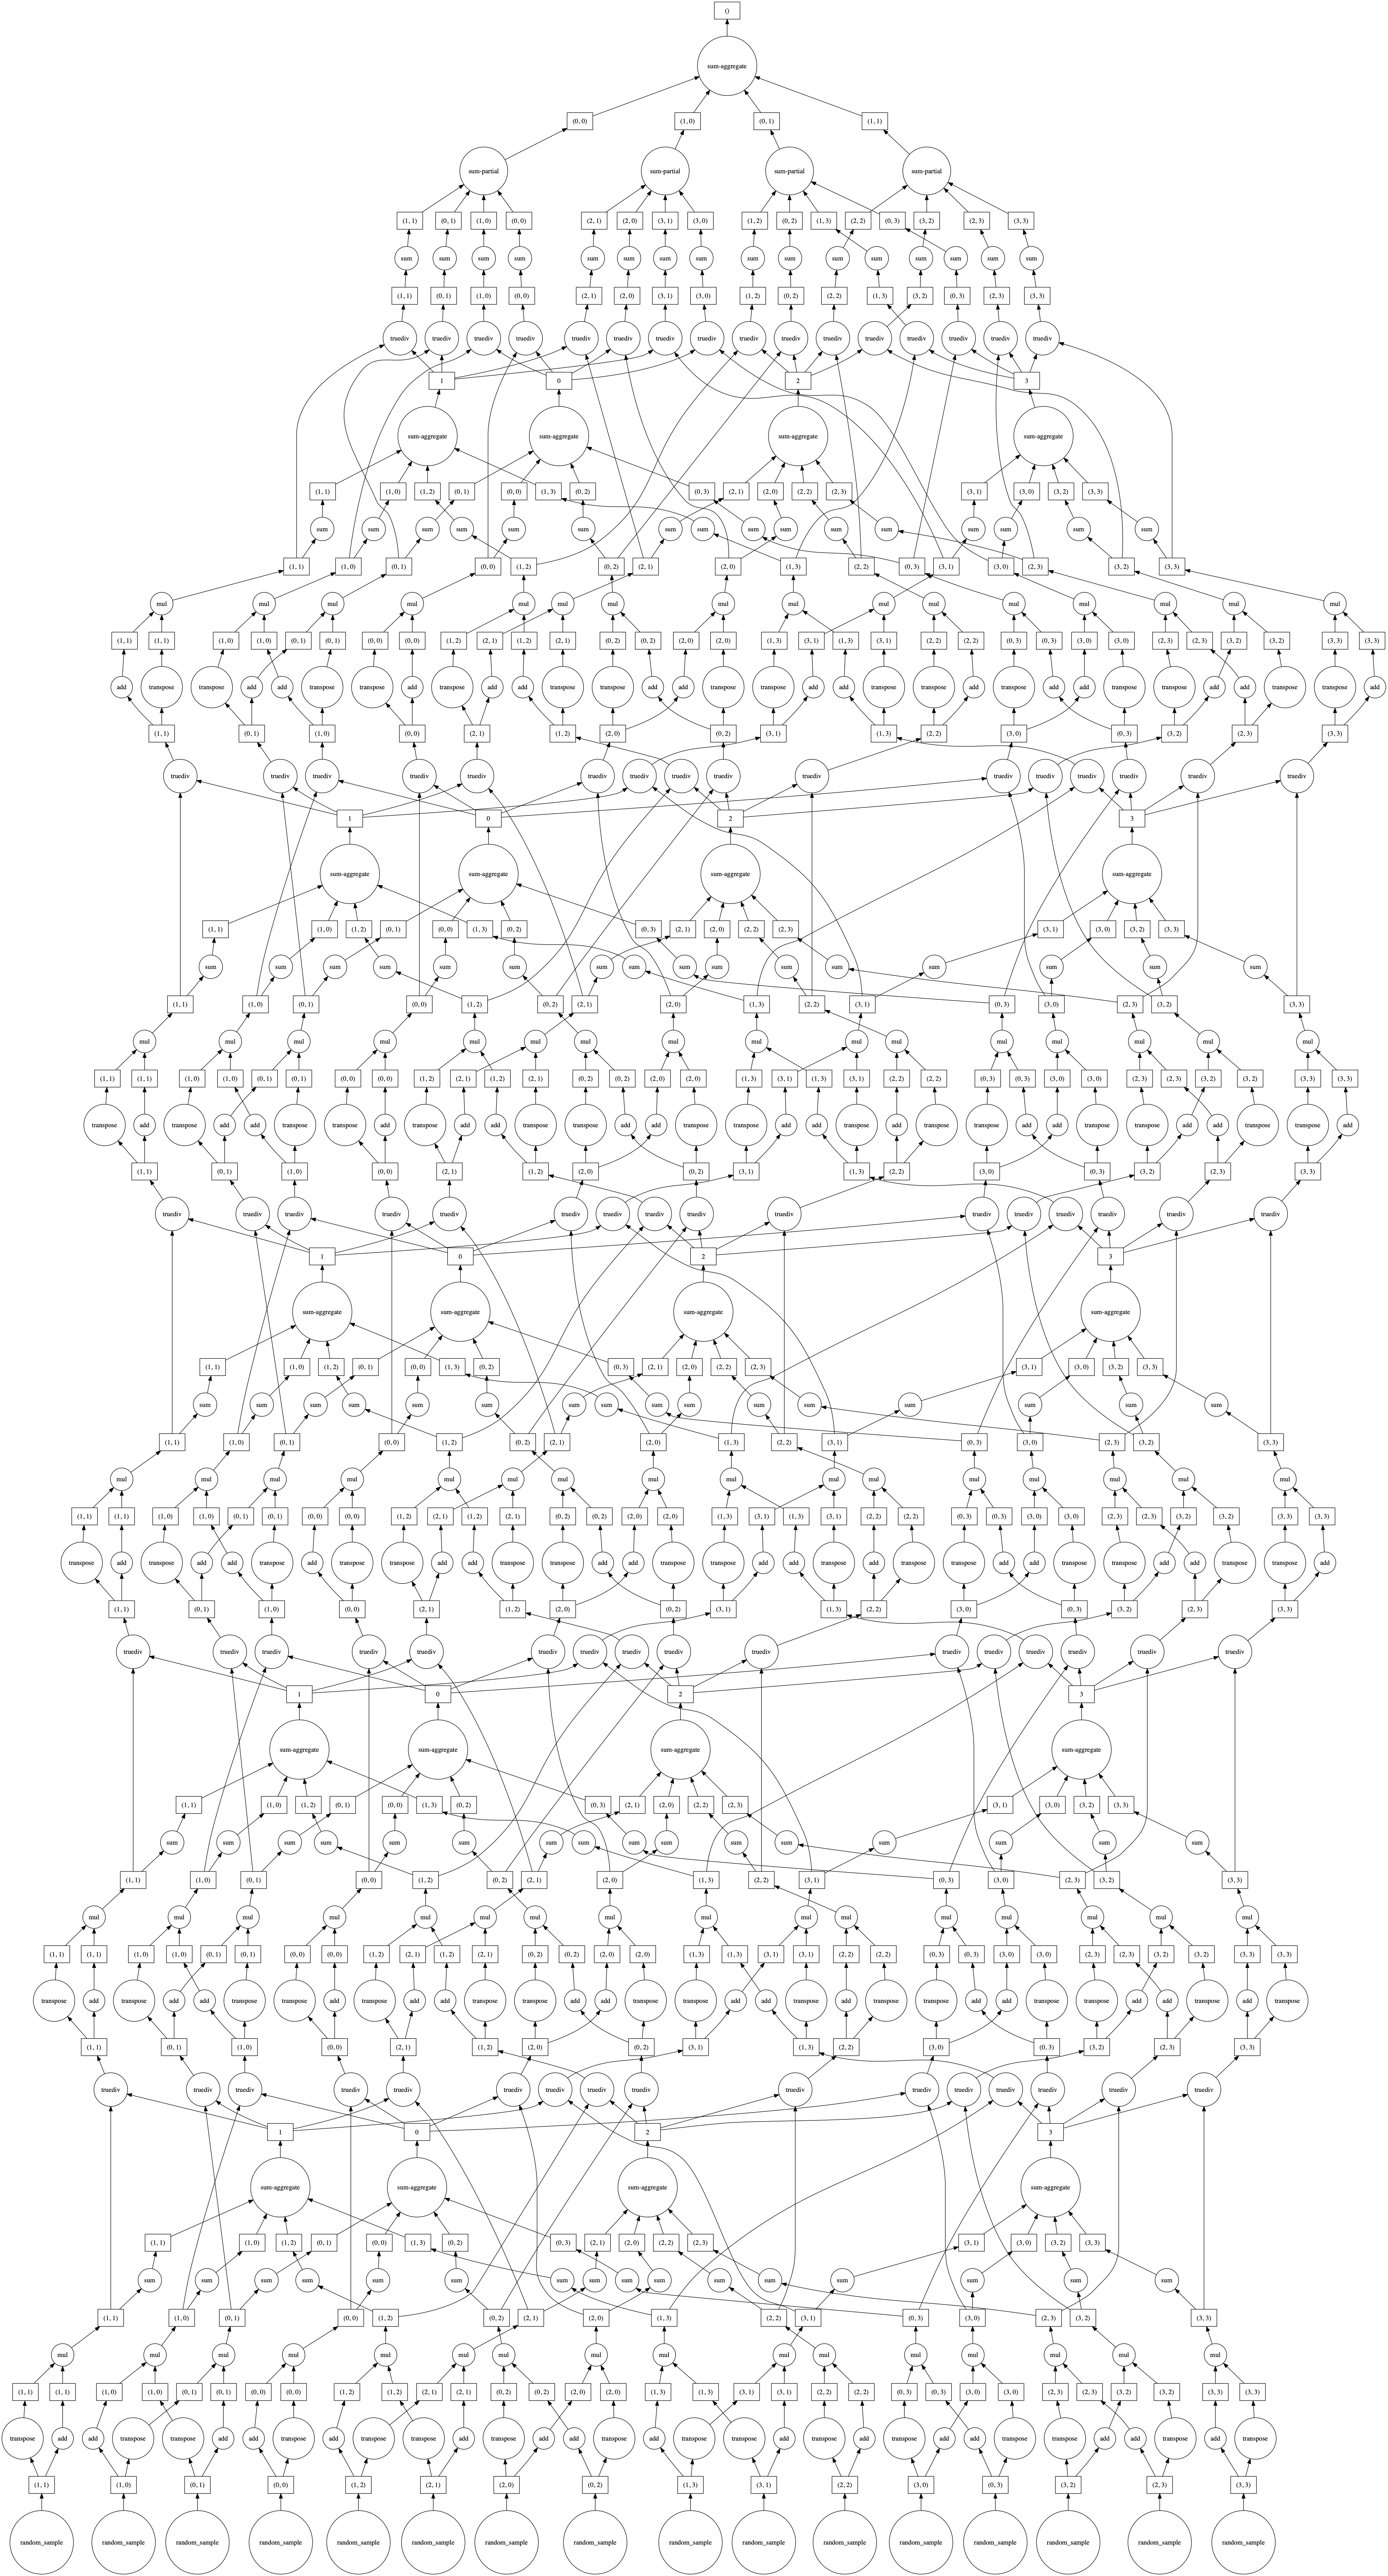

In [12]:
from random import randint
m = x
for i in range(5):
    m = ((m+1)*m.T)
    m = m / m.sum(axis=1)
m.sum().visualize()

In [13]:
m.sum().compute()

8009.595142406752

### Special mention Joblib

https://joblib.readthedocs.io/en/latest/

# Fast Code : Numba

non-vectorized fast code.

In [14]:
from numba import jit
import numpy as np

In [15]:
def sum_all(data, N):
    s = 0
    for i in range(N):
        for j in range(N):
            s+=data[i,j]
    return s

In [16]:
N=1_000
x = np.arange(0,N)
m = x*x.reshape(-1,1)
m.shape

(1000, 1000)

In [17]:
%timeit sum_all(m, N)

226 ms ± 9.87 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [18]:
@jit
def sum_all_jit(data, N):
    s = 0
    for i in range(N):
        for j in range(N):
            s+=data[i,j]
    return s

In [19]:
len(sum_all_jit.get_annotation_info())

0

In [20]:
#run once to warm up the jit. THe compilation will actually be done now
sum_all_jit(m, N)

249500250000

In [21]:
len(sum_all_jit.get_annotation_info())

1

In [22]:
%timeit sum_all_jit(m, N)

309 µs ± 2.68 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [23]:
%timeit m.sum()

419 µs ± 5.14 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


# Symbolic math with Sympy

In [24]:
from sympy import symbols, sqrt, init_printing, diff, lambdify, sin
init_printing()

In [25]:
x, y = symbols('x y')

In [26]:
eq = sin(x**2+y**2)
eq

In [27]:
grady = diff(eq, y)

In [28]:
grady

# interoperability with numerical / ML

In [29]:
d = lambdify((x,y), grady, 'numpy') # here using numpy but coudl use TF
d # is numerically fast

<function _lambdifygenerated(x, y)>

In [30]:
d(0,0)

In [34]:
d(np.linspace(0,500, 200), np.linspace(0, 500, 200))

array([ 0.00000000e+00,  5.01621127e+00,  9.76625516e+00,  1.29599602e+01,
        1.16402210e+01,  2.04464495e+00, -1.63676158e+01, -3.43086977e+01,
       -3.14831754e+01,  5.10139975e+00,  4.76066969e+01,  3.32597840e+01,
       -3.99680027e+01, -5.22774706e+01,  4.42786945e+01,  5.04461828e+01,
       -7.21430015e+01, -5.30264239e+00,  8.13625906e+01, -8.44561045e+01,
        2.65479869e+01,  4.41608539e+01, -9.37202172e+01,  1.15020123e+02,
       -1.17049001e+02,  1.12239664e+02, -1.10050788e+02,  1.15423617e+02,
       -1.28559560e+02,  1.43762735e+02, -1.47480004e+02,  1.19030446e+02,
       -4.10482343e+01, -7.54767580e+01,  1.65608223e+02, -1.32168176e+02,
       -4.26173795e+01,  1.84461934e+02, -6.90759351e+01, -1.72420057e+02,
        9.66307323e+01,  1.90679724e+02, -3.28482235e+01, -2.11982763e+02,
       -1.36528221e+02,  7.01961404e+01,  2.13521775e+02,  2.21882298e+02,
        1.35660086e+02,  2.27996419e+01, -7.25003903e+01, -1.35917754e+02,
       -1.69565544e+02, -

# Visualisation

Most of the visualisations framework rely on **matplotlib**, it is a relatively low tool that can almost do anything.

In [35]:
from numpy import meshgrid

In [36]:
xs = np.arange(-2, 2, 0.1)
ys = np.arange(-2, 2, 0.1)
XX, YY = meshgrid(xs, ys)

In [37]:
ZZ = d(XX, YY)
ZZ, ZZ.shape

(array([[ 0.58200014, -0.96627298, -2.3045058 , ..., -3.28587446,
         -2.3045058 , -0.96627298],
        [-0.91795933, -2.25095793, -3.20573926, ..., -3.71103298,
         -3.20573926, -2.25095793],
        [-2.07405522, -3.03701614, -3.53049994, ..., -3.5578442 ,
         -3.53049994, -3.03701614],
        ...,
        [ 2.79299329,  3.32039793,  3.36018619, ...,  2.97857338,
          3.36018619,  3.32039793],
        [ 2.07405522,  3.03701614,  3.53049994, ...,  3.5578442 ,
          3.53049994,  3.03701614],
        [ 0.91795933,  2.25095793,  3.20573926, ...,  3.71103298,
          3.20573926,  2.25095793]]),
 (40, 40))

In [38]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

Small trick to make matplotlib graphs interactive in Jupyter

In [39]:
%matplotlib notebook

<IPython.core.display.Javascript object>


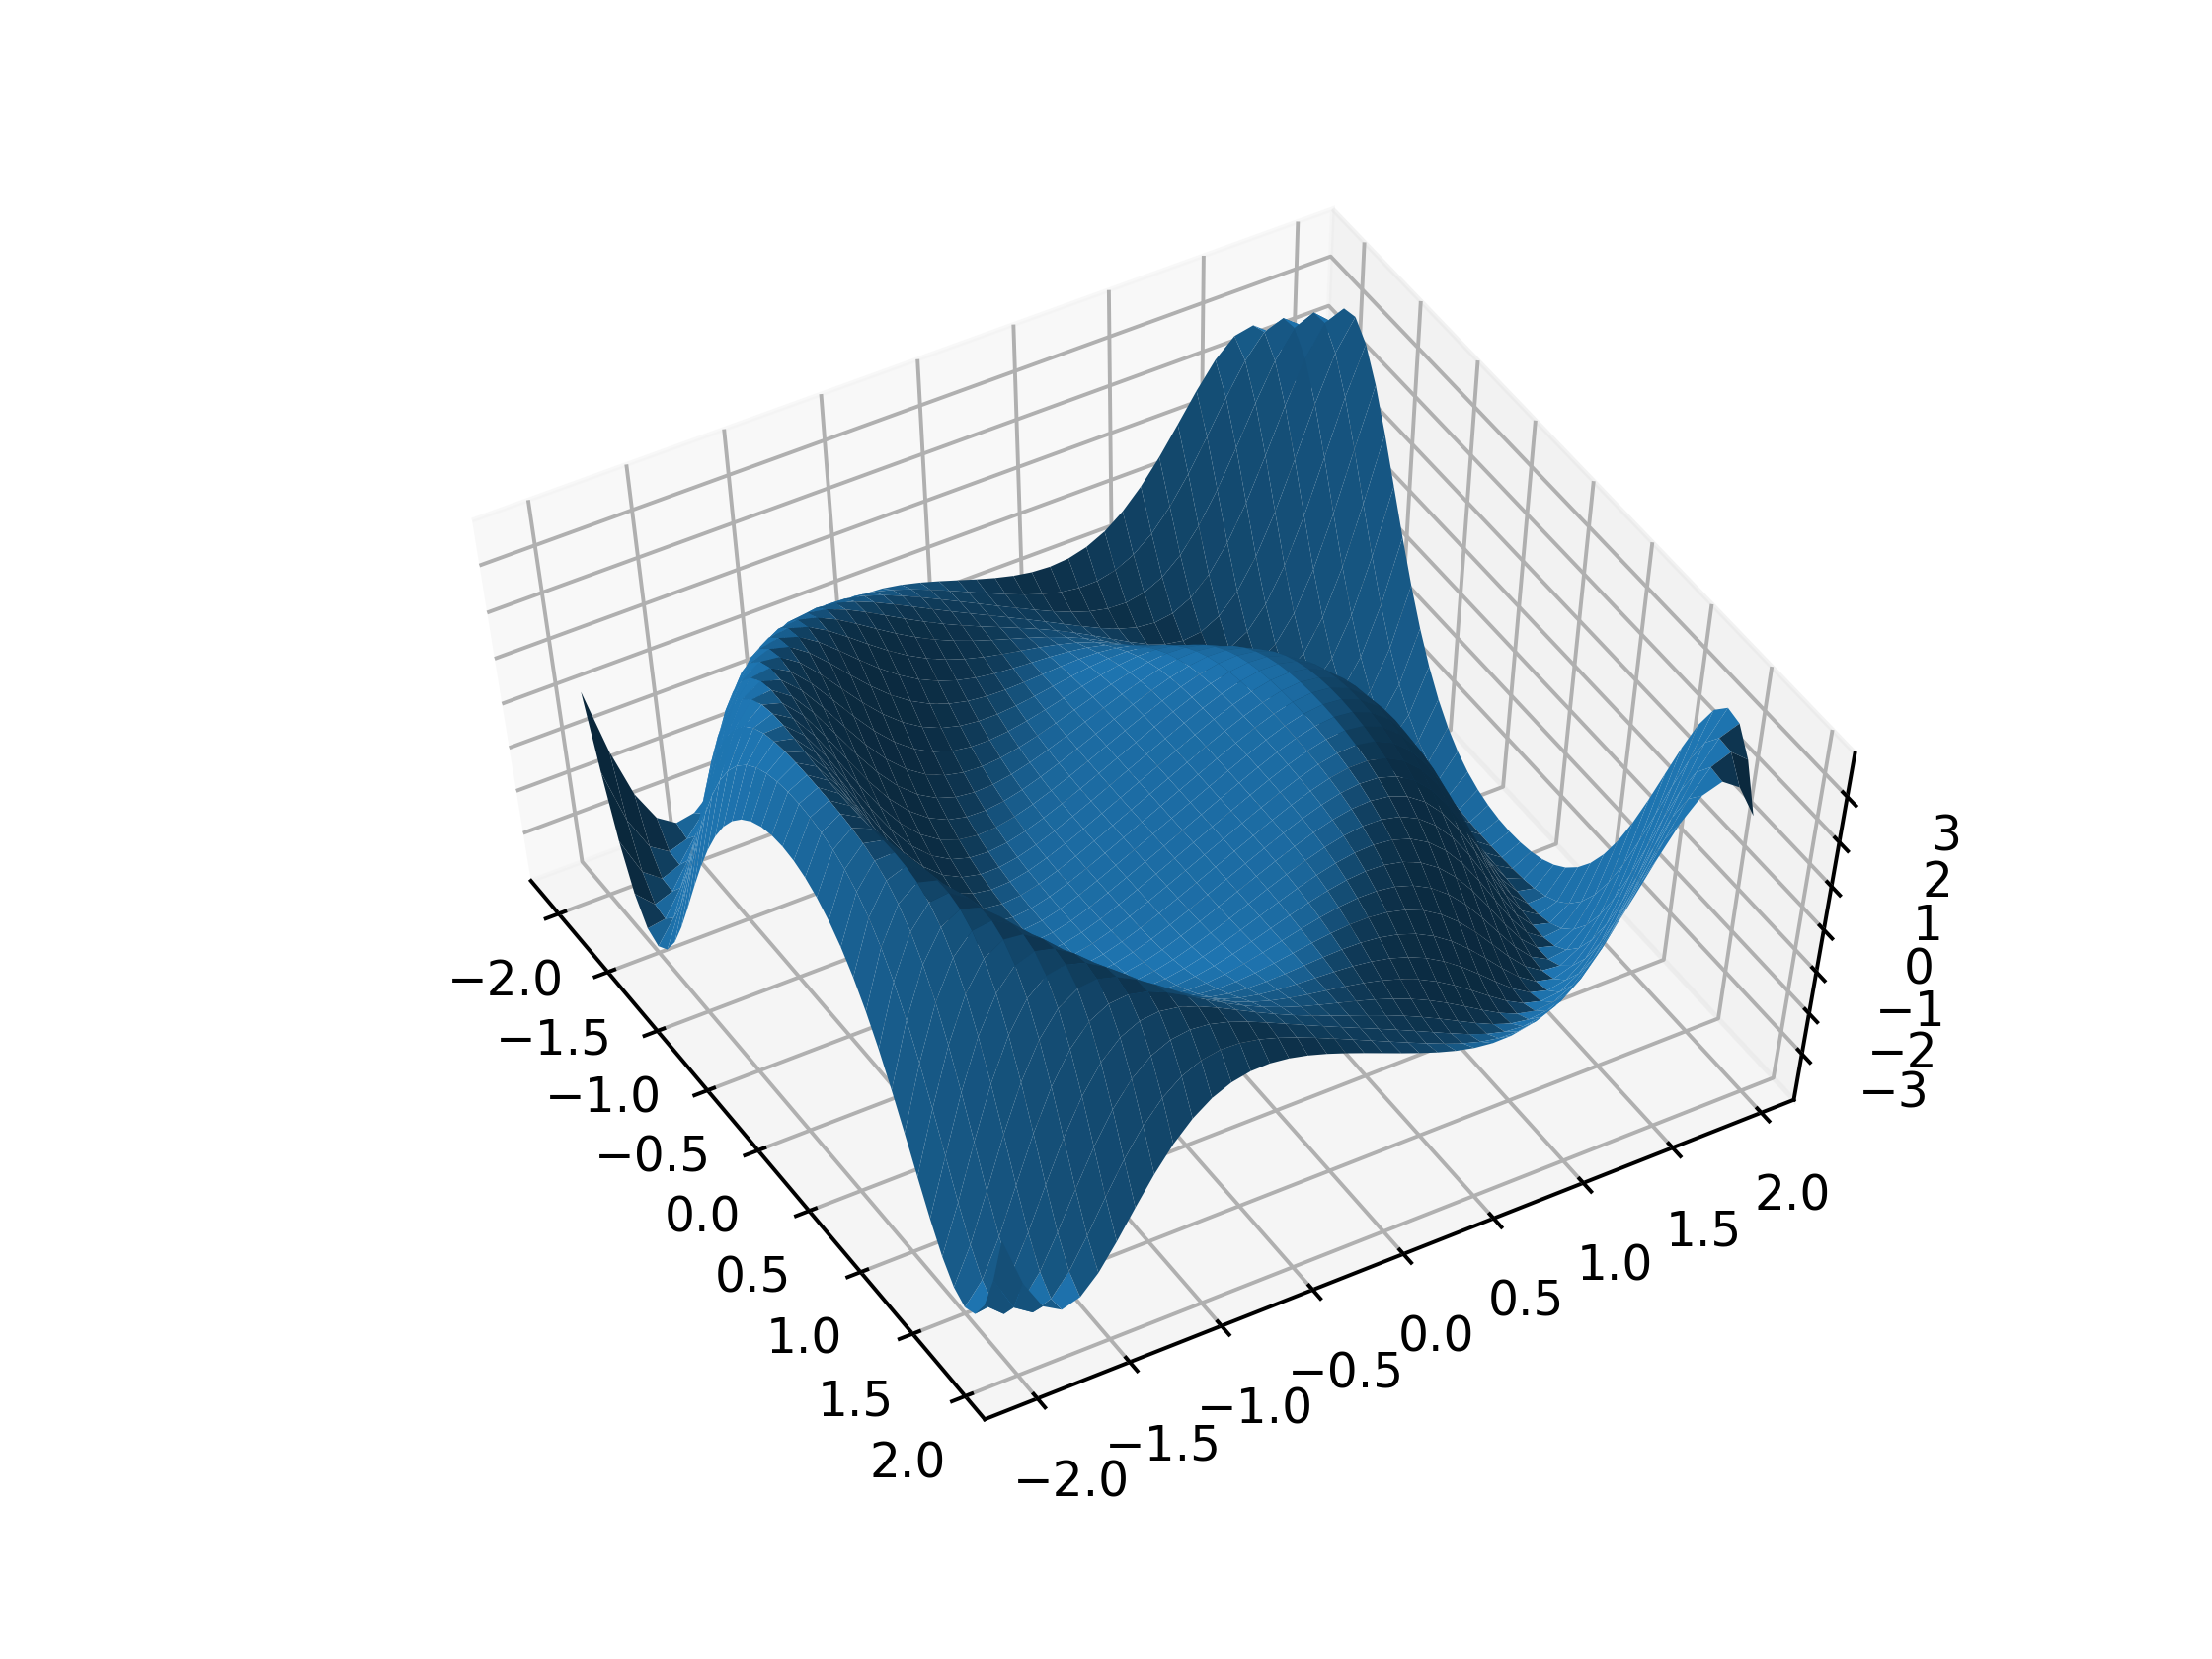

In [40]:
fig, ax = plt.subplots(subplot_kw={'projection':'3d'})
ax.plot_surface(XX, YY, ZZ)
ax

# Exploratory 3D plotting

ipyvolume is one of the simpleset, fast but limited library that can plot 3D volume

In [41]:
import ipyvolume as ipv

In [42]:

ipv.figure()
mesh = ipv.plot_surface(XX, ZZ, YY)
ipv.show()

In [44]:
u = np.linspace(-10, 10, 25)
x, y = np.meshgrid(u, u)
r = np.sqrt(x**2+y**2)
print("x,y and z are of shape", x.shape)
# and turn them into 1d
x = x.flatten()
y = y.flatten()
r = r.flatten()
print("and flattened of shape", x.shape)

x,y and z are of shape (25, 25)
and flattened of shape (625,)


In [45]:
# create a sequence of 15 time elements
time = np.linspace(0, np.pi*2, 25)
z = np.array([(np.cos(r + t) * np.exp(-r/5)) for t in time[:-2]])
print("z is of shape", z.shape)

z is of shape (23, 625)


In [46]:
# draw the scatter plot, and add controls with animate_glyphs
ipv.figure()
s = ipv.scatter(x, z, y, marker="sphere")
ipv.animation_control(s, interval=200)
ipv.ylim(-3,3)
ipv.show()

## Visualisation special mensions

### Seaborn (statistical visualisation)

https://seaborn.pydata.org/examples/index.html

### VTK, ITK more complex 3D imaging. 

### Napari (Image analysis) 

https://napari.org/

### umap 

Fast low dimentional embeding, think t-SNE++ on non-euclidian topologies.
https://umap-learn.readthedocs.io/en/latest/embedding_space.html

### Altair

Visualisation for well structured data, think stored with Pandas.



# Couple of tools, and techniques

1. Make it work, 
1. Make it correct, 
1. Make it fast

The opposite is hard. 


# pytest

Test framework, making sue you have no regerssion in your test.

- no need to be a softwarer engineer, store one result, verify it does not change when you modify your code.

# pep8, black, pyflakes

- pep8 : which format to use for python code, where to put space, upper case

Let's X be electric field, Y magnetic, K charge density, T and P, perrmitivity and permeability in vaccum, u is time:

$${\displaystyle {\begin{aligned}\nabla \cdot \mathbf {X} &=0\quad &\nabla \times \mathbf {X} &=-{\frac {\partial \mathbf {Y} }{\partial u}},\\\nabla \cdot \mathbf {Y} &=0\quad &\nabla \times \mathbf {Y} &=TP{\frac {\partial \mathbf {X} }{\partial u}}.\end{aligned}}}$$

- black: reformat your code for you. 
- pyflakes: find code smell

## Measure and Profile

If you are using IPython/Jupyter:
  - %time, %%time - measure clock time once.
  - %timeit, %%timeit - measures time in a loop.

In [47]:
%time 1+1

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 4.77 µs


In [48]:
%timeit 1+1

6.95 ns ± 0.761 ns per loop (mean ± std. dev. of 7 runs, 100000000 loops each)


In [49]:
from numpy import cos

In [50]:
load_ext line_profiler

In [51]:
data = np.random.randn(100, 100)+5

In [52]:
def target_function(data):
    nx, ny = data.shape
    out = np.zeros_like(data)
    for i in range(nx): 
        for j in range(ny):
            element = data[i,j]
            out[i,j] = sin(element) if element<5 else cos(element)
    return out

%time expected = target_function(data)

CPU times: user 2.06 s, sys: 28.2 ms, total: 2.09 s
Wall time: 2.09 s


In [59]:
def target_function_opt(data):
    nx, ny = data.shape
    out = np.zeros_like(data)
    for i in range(nx): 
        for j in range(ny):
            element = data[i,j]
            if element<5:
                out[i,j] = np.sin(element) 
            else:
                out[i,j] = cos(element)
    return out


def main(data):
    assert np.allclose(target_function_opt(data), expected)
            
            
    

In [60]:
%lprun -f target_function_opt main(data)

In [ ]:
main(data)

In [ ]:
%timeit target_function_opt(data)

In [61]:
def t2(data):
    mask = data < 4
    return np.where(mask, np.sin(data), np.cos(data))


    

In [62]:
%timeit t2(data)

245 µs ± 8.87 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
